In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import functools as ft
import statsmodels.api as sm
import scipy as sc
import statsmodels.stats.api as sms
import statsmodels.discrete.discrete_model as smdiscrete

import warnings
warnings.filterwarnings('ignore')

In [6]:
rf = np.array(1.0303) #our rfr e^(0.0198)/0.99=1.0303

Solve for e(x) = 0 to find equilibrium value of x, using bisection search:

Set x– = 1 and x+ = 1.1, and use simulated distribution of consumption growth to confirm that e(x–) < 0 and e(x+) > 0 ⇒ solution must lie between x– and x+
Set x0 = 0.5*(x– + x+) and use simulated distribution of consumption growth to calculate e(x0)
If |e(x0)| < 10–5, then you have converged to solution
Otherwise if e(x0) < 0, then solution lies between x0 and x+ ⇒ repeat from step 2 with x– = x0
Otherwise if e(x0) > 0, then solution lies between x– and x0 ⇒ repeat from step 2 with x+ = x0
Repeat for b0 in range from 0 to 10, in increments of 0.1 (or less).

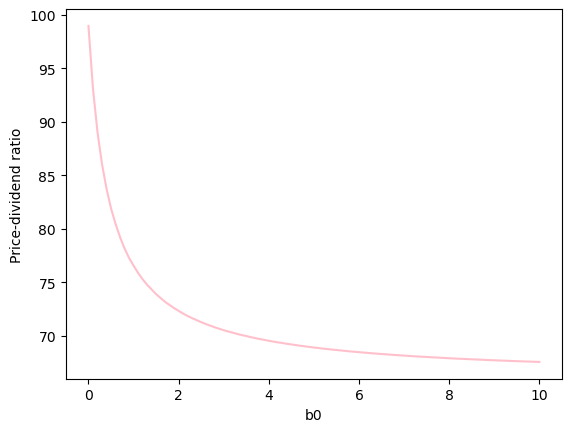

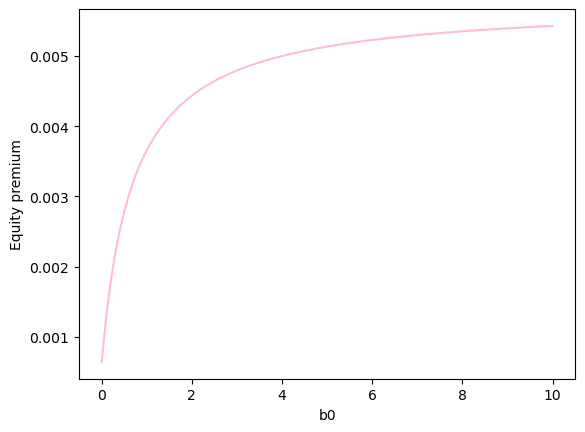

In [7]:
def BF(theta, gamma, lumbda, array_rf):
    #Consumption growth function
    g = np.array([np.exp(0.02 + 0.02 * np.random.normal()) #consumption growth distribution lng=0.02+0.02*epsilon
                for i in range (10000)]) #number of draws
    
    #Utility from financial gain or loss
    def nu_R(R):
        return [i - array_rf if i >= array_rf else lumbda * (i - array_rf) #r-risk free if r>=riskfree, 2(r-riskfree) otherwise
                for i in R]
    
    #Error term
    def e_term(x, b_0):
        return theta * b_0 * np.mean(nu_R(x*g)) + theta * x - 1 # WE'RE LOOKING FOR A VALUE OF X TO PLUG IN HERE so the error term is 0
    
    #Bisection search
    b_0 = np.linspace(0, 10, 101)
    x_values = []
    def x_term(x_neg, x_pos, b_0):
        x = 0.5 * (x_neg + x_pos)
        if np.abs(e_term(x, b_0)) < 10**(-5): # If |e(x0)| < 10–5, then you have converged to solution
            x_values.append(x)
        elif e_term(x, b_0) < 0:
            x_term(x, x_pos, b_0)
        elif e_term(x, b_0) > 0:
            x_term(x_neg, x, b_0)
    
    for i in b_0:
        x_term(1, 1.1, i)
    
    #Price-Dividend ratio
    n = len(x_values)
    pd_ratio = [1 / (x_values[i] - 1) for i in range(n)] # price/dividend ratio
    plt.plot(b_0, pd_ratio, color='pink')
    plt.xlabel('b0')
    plt.ylabel('Price-dividend ratio')
    plt.show()
    
    #Expected market return
    market_return = np.array([np.mean(x_values[i] * g) for i in range(n)])
    equity_premium = market_return - array_rf # market return minus rfr
    
    plt.plot(b_0, equity_premium, color='pink')
    plt.xlabel('b0')
    plt.ylabel('Equity premium')
    plt.show()
#------------------------------------------------------------------------------
BF(0.99, 1, 2, 1.0303) # our beta, gamma, lambda, rfr

> Briefly explain main characteristics of v(∙) (which is utility function to measure utility from recent financial gain or loss), as well as economic significance of b0 and λ.

Under Barberis, Huang and Santos model, an infinite living investor receives time-separable utility from individual consumption as well as recent financial gain or loss, which means that his risk aversion depends on recent gain/loss. If investor has won recently, he will be willing to gamble more, and vice versa with loss (house money effect). He is more sensitive to losses than he is to gains of same amount, making him loss averse. But if he accumulated certain amount of money, he will be less sensitive to losses.

The argument of nu function is Xt, which is gain or loss of investor's utility caused by previous financial gain or loss. λ is the loss sensitivity coefficient which we apply to Xt+1 when Xt+1<0 (so - in case of loss) or when Xt+1< risk-free rate (riskless bond) 
b0 is a coefficient we apply to aggregate consumption, and it reflects the importance of each financial gain or loss to the investor. 